In [7]:
#!/usr/bin/env python3

import time
import numpy as np
import gym
import gym_miniworld    

# Benchmark loading time
st = time.time()
env = gym.make('MiniWorld-FourRooms-v0')
env.seed(0)
env.reset()
load_time = 1000 * (time.time() - st)

# Benchmark the reset time
st = time.time()
for i in range(100):
    env.reset()
reset_time = 1000 * (time.time() - st) / 100

# Benchmark the rendering/update speed
st = time.time()

# Test a single step
action = 0
obs, reward, done, info = env.step(action)




Falling back to non-multisampled frame buffer
Falling back to num_samples=8
Falling back to non-multisampled frame buffer


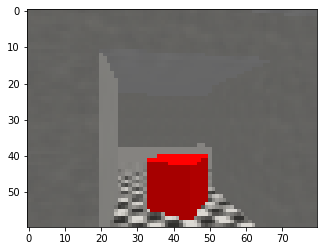

In [19]:
import matplotlib.pyplot as plt

plt.imshow(obs[:,:,:3]/255)

In [27]:
import visualpriors
import subprocess
import torch
import torch.utils
import torch.utils.model_zoo

# Load image and rescale/resize to [-1,1] and 3x256x256
o_t = torch.Tensor(obs).permute(2,0,1)[0:3,:,:]
o_t =o_t.unsqueeze(0)/128 - 1

In [28]:
feature = 'keypoints3d'
representation = visualpriors.representation_transform(o_t, feature, device='cpu') # phi(o_t) in the diagram below
pred = visualpriors.feature_readout(o_t, feature, device='cpu')

time to compute depth_euclidean = 0.051342010498046875
time to compute keypoints2d = 0.04788398742675781
time to compute keypoints3d = 0.04714012145996094
time to compute edge_texture = 0.04561185836791992
time to compute reshading = 0.05224323272705078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


time to compute denoising = 0.04964113235473633
time to compute autoencoding = 0.04847216606140137
time to compute edge_occlusion = 0.04698896408081055


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


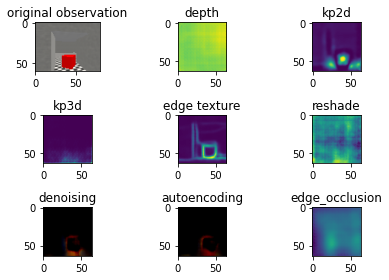

In [33]:
from time import time

def time_readout(name):
    start = time()
    out = visualpriors.feature_readout(o_t, name, device='cpu')
    stop = time()
    print('time to compute ' + name + ' = ' + str(stop-start))
    return out
    
depth = time_readout('depth_euclidean')
kp2d = time_readout('keypoints2d')
kp3d = time_readout('keypoints3d')
etext = time_readout('edge_texture')
reshade = time_readout('reshading')
denoising = time_readout('denoising')
autoencoding = time_readout('autoencoding')
segment_unsup25d = time_readout('edge_occlusion')


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
ax1.imshow(obs[:,:,0:3]/225)
ax1.set_title("original observation")
ax2.imshow(depth[0,:,:,:].permute((1,2,0)))
ax2.set_title("depth")
ax3.imshow(kp2d[0,:,:,:].permute((1,2,0)))
ax3.set_title("kp2d")
ax4.imshow(kp3d[0,:,:,:].permute((1,2,0)))
ax4.set_title("kp3d")
ax5.imshow(etext[0,:,:,:].permute((1,2,0)))
ax5.set_title("edge texture")
ax6.imshow(reshade[0,:,:,:].permute((1,2,0)))
ax6.set_title("reshade")
ax7.imshow(denoising[0,:,:,:].permute((1,2,0)))
ax7.set_title("denoising")
ax8.imshow(autoencoding[0,:,:,:].permute((1,2,0)))
ax8.set_title("autoencoding")
ax9.imshow(segment_unsup25d[0,:,:,:].permute((1,2,0)))
ax9.set_title("edge_occlusion")
fig.tight_layout()
plt.show()

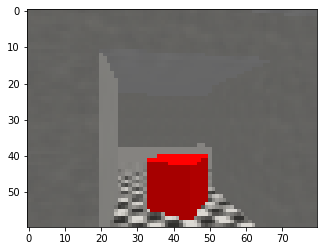

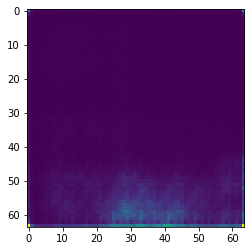

In [35]:
plt.imshow(obs[:,:,0:3]/255)
plt.show()
plt.imshow(pred[0,:,:,:].permute((1,2,0)))
plt.show()

Falling back to non-multisampled frame buffer
Falling back to num_samples=8
Falling back to non-multisampled frame buffer


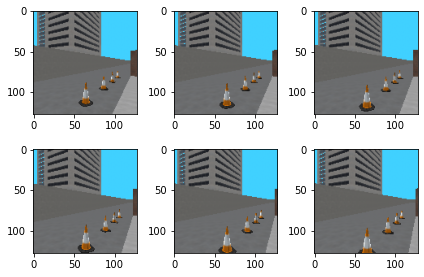

In [43]:
from gym_miniworld.envs.sidewalk import Sidewalk

miniworld = Sidewalk(obs_height=128, obs_width=128)

obs1, _, _, _ = miniworld.step(2)
obs2, _, _, _ = miniworld.step(2)
obs3, _, _, _ = miniworld.step(2)
obs4, _, _, _ = miniworld.step(2)
obs5, _, _, _ = miniworld.step(2)
obs6, _, _, _ = miniworld.step(2)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.imshow(obs1[:,:,0:3]/255)
ax2.imshow(obs2[:,:,0:3]/255)
ax3.imshow(obs3[:,:,0:3]/255)
ax4.imshow(obs4[:,:,0:3]/255)
ax5.imshow(obs5[:,:,0:3]/255)
ax6.imshow(obs6[:,:,0:3]/255)
fig.tight_layout()

plt.show()